# Results

## Contour Compatibility

### Corpus

Conser's Aeschylus: **80.2%** compatibility.

For Aristophanes: ≈ **82.0**!

In [1]:
from src.comp import compatibility_corpus, compatibility_ratios_to_stats

all_sets = compatibility_corpus('data/compiled/')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Total compatibility: {total_comp}')


Total compatibility: 0.8203293583191369


### Play

	ach:	0.8170377541142304
	eq:	0.8115438108484005
	nu:	0.82
	v:	0.817450495049505
	pax:	0.82531328320802
	av:	0.8145285935085008
	lys:	0.8303571428571429
	th:	0.812807881773399
	ra:	0.8048780487804879
	ec:	0.8333333333333334
	pl:	0.8900709219858156


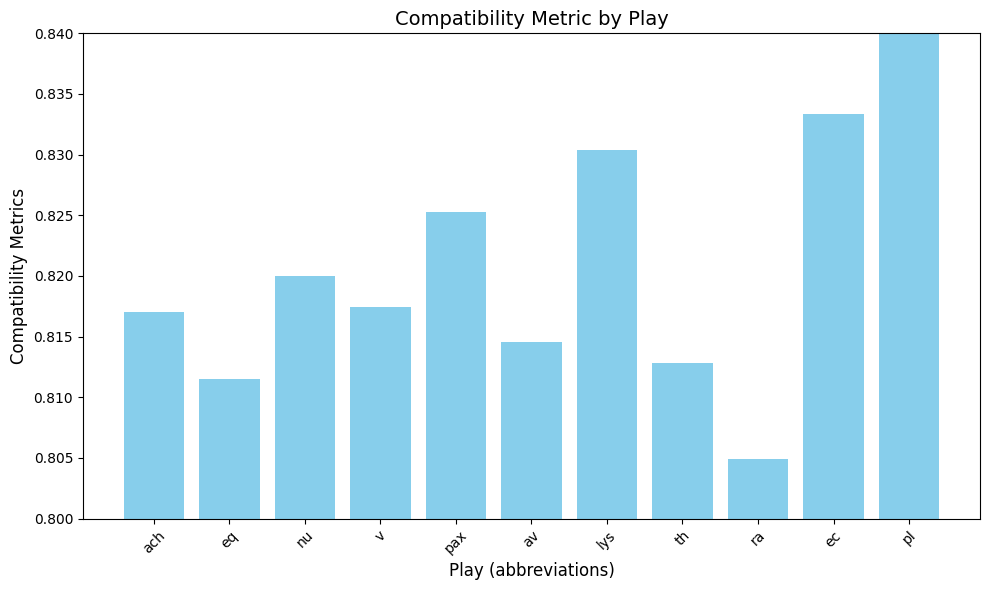

In [1]:
from src.comp import compatibility_play, compatibility_ratios_to_stats, compatibility_canticum
from plot import plot_dict

def prepare_compatibility_stat(abbreviation):
    list = compatibility_play(f'data/compiled/responsion_{abbreviation}_compiled.xml')
    return compatibility_ratios_to_stats(list)
    

abbreviations = [
    'ach',
    'eq',
    'nu',
    'v',
    'pax',
    'av',
    'lys',
    'th',
    'ra',
    'ec',
    'pl'
]

play_dict = {}
for play in abbreviations:
    play_dict[play] = prepare_compatibility_stat(play)
    print(f'\t{play}:\t{play_dict[play]}')

plot_dict(play_dict)




### Canticum

63 canticum IDs: ['ach01', 'ach02', 'ach03', 'ach04', 'ach05', 'ach06', 'ach07', 'ach08', 'ach09', 'eq01', 'eq02', 'eq03', 'eq04', 'eq05', 'eq06', 'eq07', 'eq08', 'nu01', 'nu02', 'nu03', 'nu04', 'nu05', 'nu06', 'v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'pax01', 'pax02', 'pax03', 'pax04', 'pax05', 'pax06', 'av01', 'av02', 'av03', 'av04', 'av05', 'av06', 'av07', 'av08', 'av09', 'lys01', 'lys02', 'lys03', 'lys04', 'lys05', 'lys06', 'lys07', 'lys08', 'th01', 'th02', 'th03', 'th04', 'ra01', 'ra02', 'ec01', 'pl01', 'pl02']


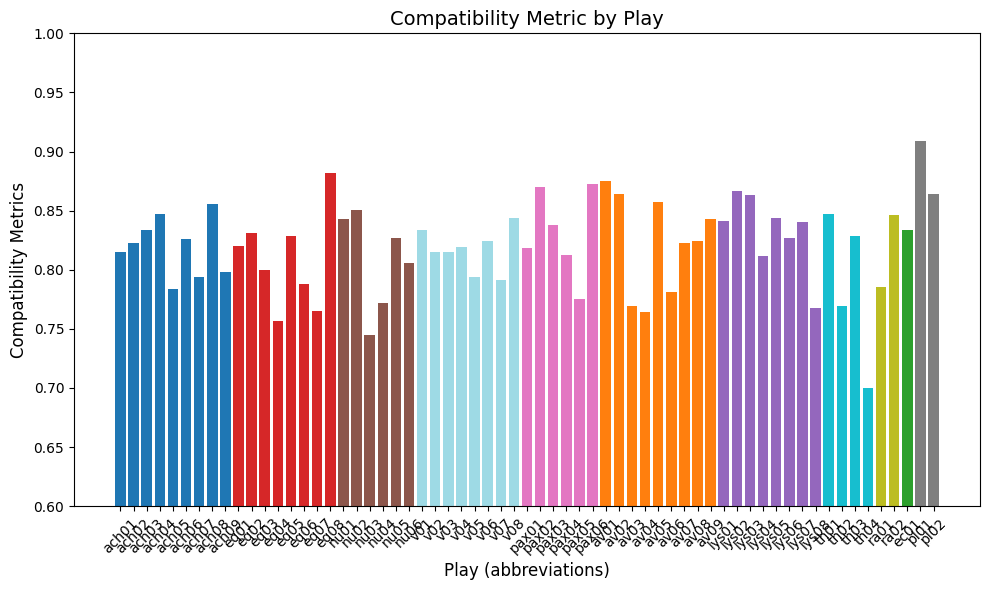

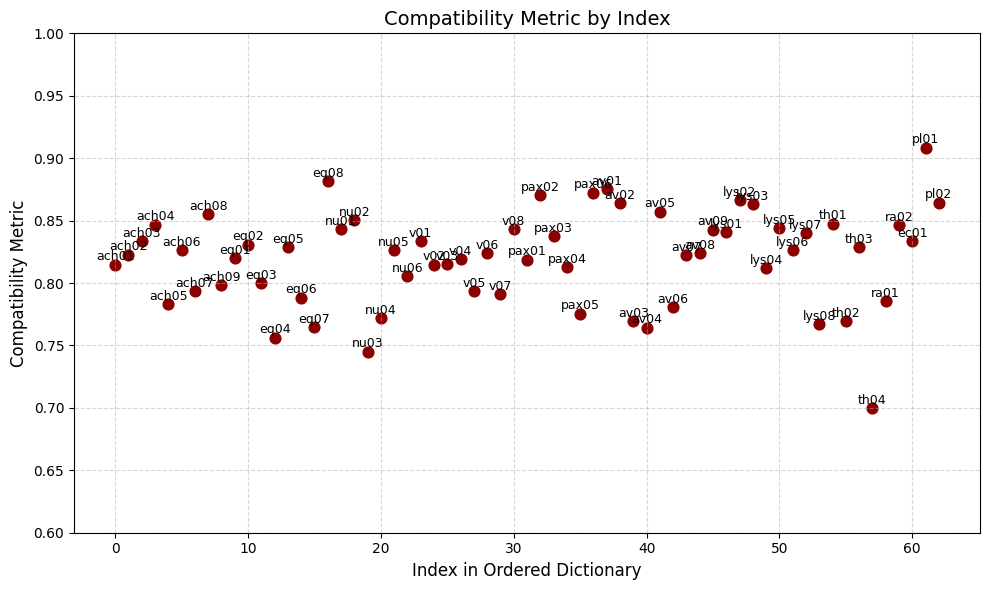

In [2]:
from lxml import etree

from src.comp import compatibility_canticum, compatibility_ratios_to_stats
from plot_cantica import plot_dict
from plot_2d import plot_dict_as_points

canticum_ids = []

def process_xml(file_path):
    # Parse the XML file
    tree = etree.parse(file_path)
    root = tree.getroot()

    strophe_elements = root.xpath("//strophe")

    for strophe in strophe_elements:
        id = strophe.get("responsion")
        canticum_ids.append(id)

def prepare_compatibility_stat_canticum(canticum_id):
    list = compatibility_canticum(f'data/compiled/responsion_{canticum_id[:-2]}_compiled.xml', canticum_id)
    return compatibility_ratios_to_stats(list)

abbreviations = [
    'ach',
    'eq',
    'nu',
    'v',
    'pax',
    'av',
    'lys',
    'th',
    'ra',
    'ec',
    'pl'
]

# Process each XML file in the directory
for abbreviation in abbreviations:
    file_path = f'data/compiled/responsion_{abbreviation}_compiled.xml'
    process_xml(file_path)

seen = set()
canticum_ids = [x for x in canticum_ids if not (x in seen or seen.add(x))] # neat trick

print(f'{len(canticum_ids)} canticum IDs: {canticum_ids}')

canticum_dict = {}
for canticum_id in canticum_ids:
    canticum_dict[canticum_id] = prepare_compatibility_stat_canticum(canticum_id)

plot_dict(canticum_dict, y_start=0.6, y_end=1)
plot_dict_as_points(canticum_dict, y_start=0.6, y_end=1)


